Este es el código para calcular el producto escalar de input_vector
y weights_1:

In [1]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]
# Cálculo del producto punto del input_vector y weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

In [3]:
# Cálculo del producto punto del input_vector y weights_1
first_indexes_mult = input_vector[0] * weights_1[0]  # Multiplicación del primer elemento de input_vector con el primer elemento de weights_1
second_indexes_mult = input_vector[1] * weights_1[1]  # Multiplicación del segundo elemento de input_vector con el segundo elemento de weights_1
dot_product_1 = first_indexes_mult + second_indexes_mult  # Suma de los productos anteriores para obtener el producto punto


In [2]:
print(f"El producto punto es: {dot_product_1}")

El producto punto es: 2.1672


In [4]:
import numpy as np
dot_product_1 = np.dot(input_vector, weights_1)
print(f"El producto punto es: {dot_product_1}")

El producto punto es: 2.1672


producto escalar de input_vector y weights_2:

In [5]:
dot_product_2 = np.dot(input_vector, weights_2)
print(f"El producto punto es: {dot_product_2}")

El producto punto es: 4.1259999999999994


Para ver la diferencia, veamos cómo podrías multiplicar dos tensores
usando cada método. Aquí hay un ejemplo que usa el antiguo método
TensorFlow 1.0:

In [6]:
import tensorflow as tf

In [8]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32, name = "x")
y = tf.compat.v1.placeholder(tf.float32, name = "y")
multiply = tf.multiply(x, y)
with tf.compat.v1.Session() as session:
  m = session.run(multiply, feed_dict={x: [[2., 4., 6.]], y: [[1.], [3.], [5.]]})
  print(m)

[[ 2.  4.  6.]
 [ 6. 12. 18.]
 [10. 20. 30.]]


Regresión Lineal con RN

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
observations=1000
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-10,10,(observations,1))
generated_target=2*xs-3*zs+5+noise

In [6]:
# Generación de datos para un modelo
observations = 1000  # Número de observaciones

# Generación de variables independientes aleatorias
xs = np.random.uniform(-10, 10, (observations, 1))  # Variable independiente x, valores uniformemente distribuidos entre -10 y 10
zs = np.random.uniform(-10, 10, (observations, 1))  # Variable independiente z, valores uniformemente distribuidos entre -10 y 10

# Combinación de variables independientes en un solo array
generated_inputs = np.column_stack((xs, zs))  # Array de variables independientes combinadas (xs y zs)

# Generación de ruido aleatorio
noise = np.random.uniform(-10, 10, (observations, 1))  # Ruido aleatorio, valores uniformemente distribuidos entre -10 y 10

# Generación de la variable dependiente a partir de las variables independientes y el ruido
generated_target = 2 * xs - 3 * zs + 5 + noise  # Variable dependiente generada a partir de xs, zs y ruido


In [7]:
# Guardar los datos generados en un archivo comprimido utilizando NumPy
np.savez('TF_intro', input=generated_inputs, targets=generated_target)

# Cargar los datos guardados desde el archivo comprimido utilizando NumPy
training_data = np.load('TF_intro.npz')


Definición del modelo

In [1]:
!pip install --upgrade tensorflow keras


  Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)


In [8]:
# Definir el tamaño de entrada y salida del modelo
input_size = 2  # Tamaño de la capa de entrada
output_size = 1  # Tamaño de la capa de salida

# Definir la arquitectura del modelo utilizando Keras Sequential API
models = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)  # Capa densa con el tamaño de salida especificado
])

# Definir un optimizador personalizado (Stochastic Gradient Descent - SGD) con una tasa de aprendizaje específica
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# Compilar el modelo especificando el optimizador y la función de pérdida
models.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Entrenar el modelo utilizando los datos de entrada y salida objetivo proporcionados, durante un número específico de épocas
models.fit(training_data['input'], training_data['targets'], epochs=100, verbose=1)


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 67.2890
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 37.1531
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 36.3760
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 37.9680
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 37.4788
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 41.6280
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 40.6090
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 38.0196
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 40.7837
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 38.9155
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 36.8913
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 36.4472
Epoch 13/100
32/32 [=====

Obtener pesos y sesgos

In [9]:
# Obtener los pesos de la primera capa del modelo
models.layers[0].get_weights()


[array([[ 1.9111255],
        [-2.0242155]], dtype=float32),
 array([5.122301], dtype=float32)]

Aquí, la primera matriz representa los pesos y la segunda matriz representa los sesgos.

Podemos observar claramente que los valores
predichos de los pesos están muy cerca del valor real de los pesos.

In [10]:
# Obtener los pesos y el sesgo de la primera capa del modelo
weights = models.layers[0].get_weights()[0]  # Obtener los pesos de la primera capa
bias = models.layers[0].get_weights()[1]     # Obtener el sesgo de la primera capa

# Realizar una predicción utilizando el modelo entrenado
# (El código para realizar la predicción debe ser agregado aquí)


Predicción y Precisión

La fórmula del Error Cuadrático Medio (RMSE) se expresa como:

RMSE = sqrt((Σ (xᵢ - x̂ᵢ)²) / N)


Donde:
- \( N \) es el número total de observaciones.
- \( x_i \) es el valor observado o real.
- \( \hat{x}_i \) es el valor predicho por el modelo para la observación \( i \).

Esta fórmula calcula la raíz cuadrada de la media de los cuadrados de las diferencias entre los valores predichos y los valores reales. El RMSE es una medida comúnmente utilizada para evaluar la precisión de los modelos de regresión, donde un RMSE más bajo indica un mejor ajuste del modelo a los datos observados.

In [11]:
# Redondear los valores reales de los datos de entrenamiento a 1 decimal
out = training_data['targets'].round(1)

# Importar la función mean_squared_error del módulo metrics en la biblioteca scikit-learn
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio (RMSE) entre los valores reales y los valores redondeados
# El parámetro squared=False especifica que se desea obtener la raíz cuadrada del error cuadrático medio (RMSE)
mean_squared_error(generated_target, out, squared=False)


0.02885449582666823

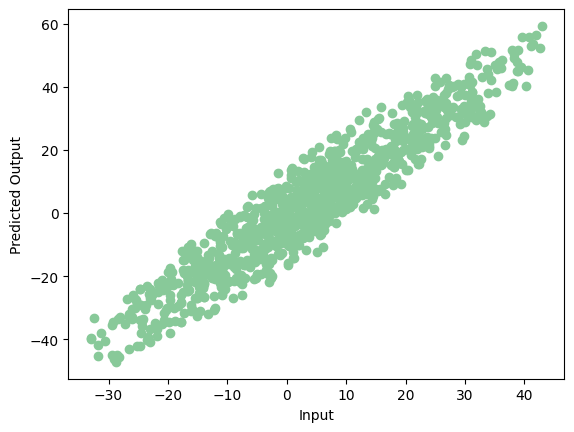

In [12]:
# Importar la biblioteca matplotlib para visualización
import matplotlib.pyplot as plt

# Realizar predicciones utilizando el modelo y graficar la relación entre las predicciones y los objetivos reales
plt.scatter(np.squeeze(models.predict_on_batch(training_data['input'])),  # Predicciones del modelo
            np.squeeze(training_data['targets']),                        # Objetivos reales
            c='#88c999')                                                 # Color de los puntos en el gráfico

# Etiquetar el eje x e y del gráfico
plt.xlabel('Input')                # Etiqueta del eje x
plt.ylabel('Predicted Output')     # Etiqueta del eje y

# Mostrar el gráfico
plt.show()


Nuestro modelo entrena correctamente con muy poco error. Este es el
final de su primera red neuronal. Tenga en cuenta que cada vez que
entrenamos el modelo podemos obtener un valor diferente de precisión,
pero no diferirán mucho

Clasificación con Redes Neuronales

Aquí tienes un ejemplo básico de cómo crear, compilar y ajustar un modelo de red neuronal para clasificación utilizando TensorFlow:

```python
import tensorflow as tf

# Paso 1: Creación de un modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),  # Capa oculta con 64 neuronas y función de activación ReLU
    tf.keras.layers.Dense(10, activation='softmax')                 # Capa de salida con 10 neuronas para clasificación multiclase y función de activación Softmax
])

# Paso 2: Compilar un modelo
model.compile(optimizer='adam',                               # Optimizador Adam
              loss='sparse_categorical_crossentropy',         # Función de pérdida para clasificación multiclase
              metrics=['accuracy'])                           # Métrica para evaluar el rendimiento del modelo

# Paso 3: Ajuste de un modelo
history = model.fit(X_train, y_train,                        # Datos de entrenamiento
                    epochs=10,                                # Número de épocas de entrenamiento
                    batch_size=32,                            # Tamaño del lote de datos durante el entrenamiento
                    validation_data=(X_val, y_val))          # Datos de validación para monitorear el rendimiento del modelo durante el entrenamiento
```

En este ejemplo:

- Se crea un modelo secuencial con dos capas densas (totalmente conectadas). La primera capa oculta tiene 64 neuronas con función de activación ReLU, y la segunda capa de salida tiene 10 neuronas con función de activación Softmax para la clasificación multiclase.
- El modelo se compila con el optimizador Adam, la función de pérdida de entropía cruzada categórica dispersa (sparse_categorical_crossentropy) para la clasificación multiclase y se utiliza la métrica de precisión (accuracy) para evaluar el rendimiento del modelo.
- El modelo se ajusta (entrena) utilizando datos de entrenamiento (X_train, y_train) durante 10 épocas, con un tamaño de lote de 32. Los datos de validación (X_val, y_val) se utilizan para monitorear el rendimiento del modelo durante el entrenamiento. Los resultados del entrenamiento se almacenan en el objeto history para su posterior análisis y visualización.

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Cargar datos de ejemplo (usando el conjunto de datos Iris)
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación de un modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Ajustar el modelo
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/10
4/4 [==============================] - 1s 78ms/step - loss: 3.4222 - accuracy: 0.0000e+00 - val_loss: 2.9987 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 2.9893 - accuracy: 0.1583 - val_loss: 2.6205 - val_accuracy: 0.3667
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 2.6297 - accuracy: 0.3250 - val_loss: 2.2924 - val_accuracy: 0.3667
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 2.2891 - accuracy: 0.3250 - val_loss: 1.9929 - val_accuracy: 0.3667
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 1.9832 - accuracy: 0.3250 - val_loss: 1.7190 - val_accuracy: 0.3667
Epoch 6/10
4/4 [==============================] - 0s 18ms/step - loss: 1.6944 - accuracy: 0.3250 - val_loss: 1.4949 - val_accuracy: 0.3667
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 1.4810 - accuracy: 0.3250 - val_loss: 1.3295 - val_accuracy: 0.3667
Epoch 8/10
4/4 [===

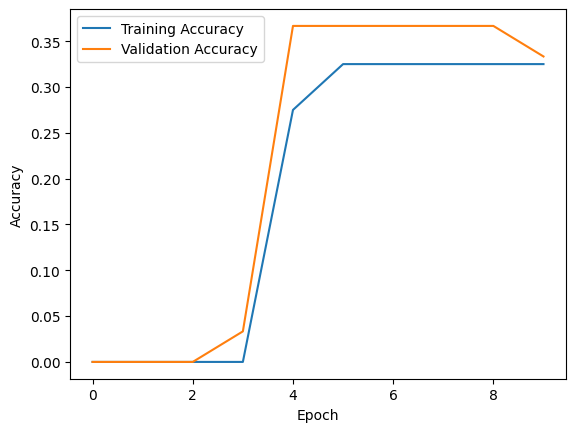

1/1 [==============================] - 0s 297ms/step
Confusion Matrix:
[[0 2 8]
 [0 1 8]
 [0 2 9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.20      0.11      0.14         9
   virginica       0.36      0.82      0.50        11

    accuracy                           0.33        30
   macro avg       0.19      0.31      0.21        30
weighted avg       0.19      0.33      0.23        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Cargar datos de ejemplo (usando el conjunto de datos Iris)
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Visualización de métricas de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Informe de clasificación
class_names = iris_data.target_names
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))


In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la precisión y el error
accuracy = accuracy_score(y_test, y_pred_classes)
error = 1 - accuracy

# Imprimir el error, precisión y exactitud
print(f"Error: {error}")
print(f"Precisión: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))


1/1 [==============================] - 0s 141ms/step
Error: 0.6666666666666667
Precisión: 0.3333333333333333

Classification Report:
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.20      0.11      0.14         9
   virginica       0.36      0.82      0.50        11

    accuracy                           0.33        30
   macro avg       0.19      0.31      0.21        30
weighted avg       0.19      0.33      0.23        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



**Referencias**

- Control de Python
  [Real Python](https://realpython.com/)

- Librería Keras
  [Instalación de Keras en Anaconda](https://unipython.com/introduccion-y-como-instalar-keras-anaconda/#:~:text=Keras%20es%20una%20biblioteca%20de,la%20investigaci%C3%B3n%20como%20el%20desarrollo.)

- Regresión con Redes Neuronales
  [Sitio Big Data - Regresión con Redes Neuronales](https://sitiobigdata.com/2018/10/01/redes-neuronales-profundas-problemas-regresion/)

- Tipos de Redes Neuronales
  [Diego Calvo - Clasificación de Redes Neuronales Artificiales](https://www.diegocalvo.es/clasificacion-de-redes-neuronales-artificiales/)

- Clasificación con Redes Neuronales
  [Artículo en Scielo](https://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S1578-84232015000100003)

**Material Complementario**

- Regresión con Redes Neuronales
  [YouTube - Regresión con Redes Neuronales](https://www.youtube.com/watch?v=u9Cg0jguzlQ)

- Tipos de Redes Neuronales – Clasificación
  [YouTube - Tipos de Redes Neuronales](https://www.youtube.com/watch?v=xj4MVkd1HXA)
